## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Dataset

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

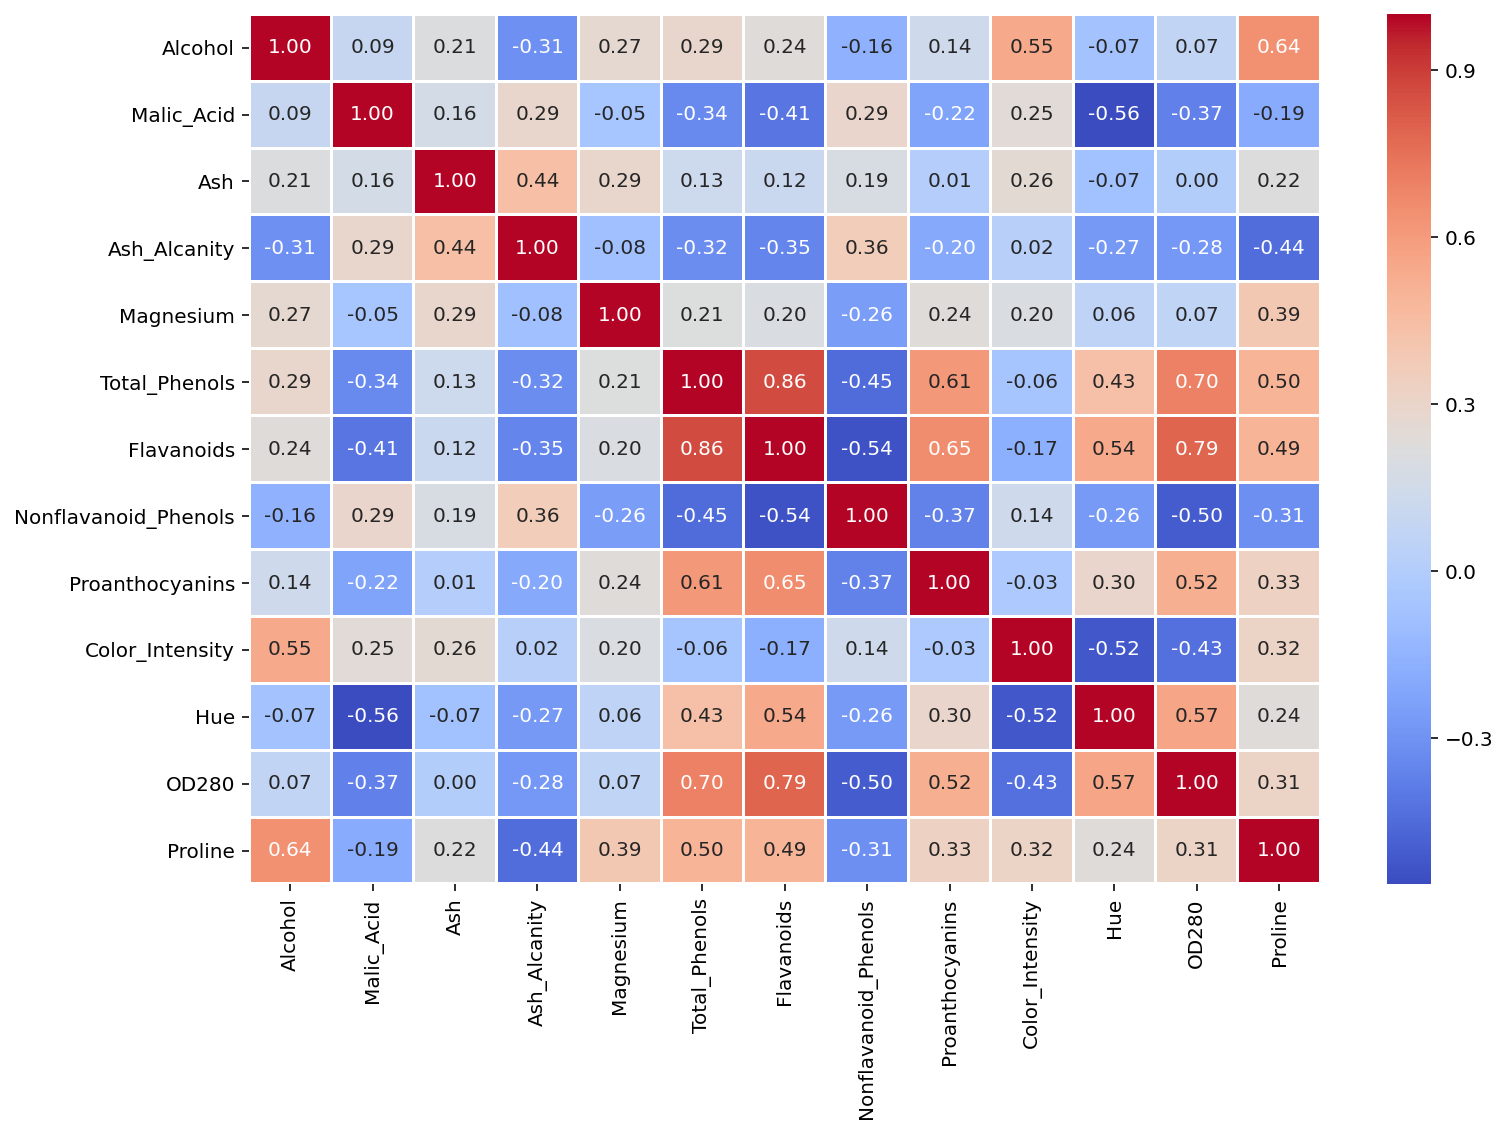

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", linewidths=1, cmap="coolwarm")
plt.show()

## Building model pipeline

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(n_components=2)),
    ("logreg", LogisticRegression(C=1.0, random_state=0))
])

In [9]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lda',
                 LinearDiscriminantAnalysis(n_components=2, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
lda = model[1]
print(f"Explained variance:\n{lda.explained_variance_ratio_}")

Explained variance:
[0.73931691 0.26068309]


In [11]:
y_pred = model.predict(X_test)

##### Model Evaluation

+ Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



+ Confusion Matrix

In [13]:
y_predicted = pd.DataFrame(data=y_pred, index=y_test.index, columns=["Predicted"])
complete = pd.merge(left=y_test, right=y_predicted, right_index=True, left_index=True)

complete["Customer_Segment"] = complete["Customer_Segment"]
complete["Predicted"] = complete["Predicted"]

conf_matrix = complete.groupby(["Customer_Segment", "Predicted"]).size().unstack("Predicted").fillna(0)
conf_matrix

Predicted,1,2,3
Customer_Segment,,,
1,14.0,0.0,0.0
2,0.0,16.0,0.0
3,0.0,0.0,6.0


+ Decision Boundaries

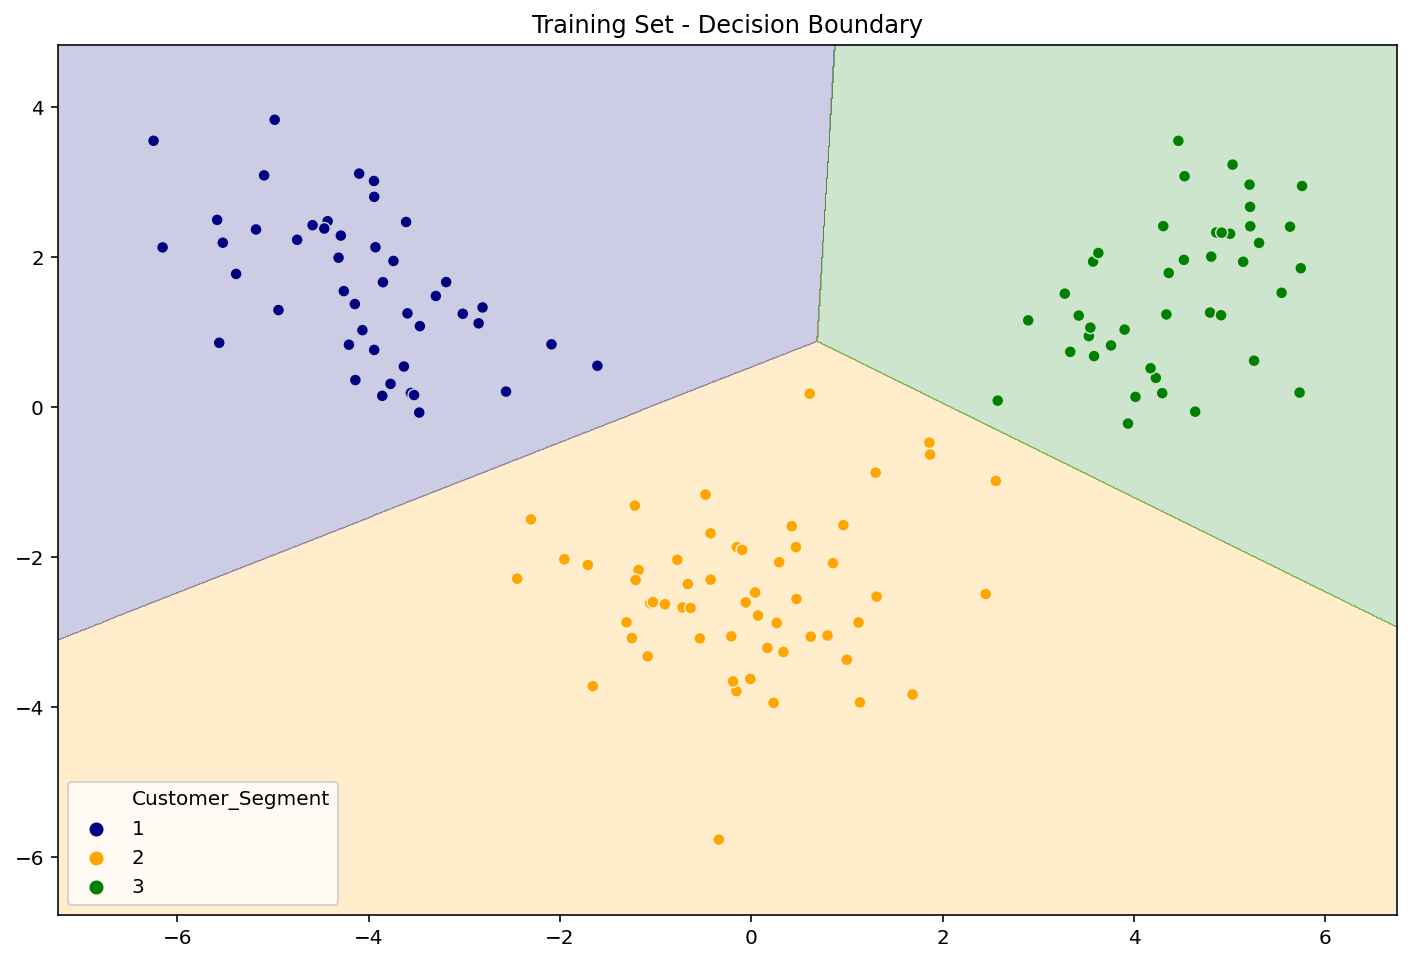

In [14]:
from matplotlib.colors import ListedColormap

X_pca = model[:2].transform(X_train)

fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(X_pca[:,0], X_pca[:,1], 
                    hue=y_train, palette=["navy", "orange", "green"], ax=ax)
xx, yy = np.mgrid[X_pca[:,0].min()-1:X_pca[:,0].max()+1:0.01,
                  X_pca[:,1].min()-1:X_pca[:,1].max()+1:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
classes = model[-1].predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, classes, cmap=ListedColormap(("navy", "orange", "green")), alpha=0.2)
ax.set_title("Training Set - Decision Boundary")
plt.show()

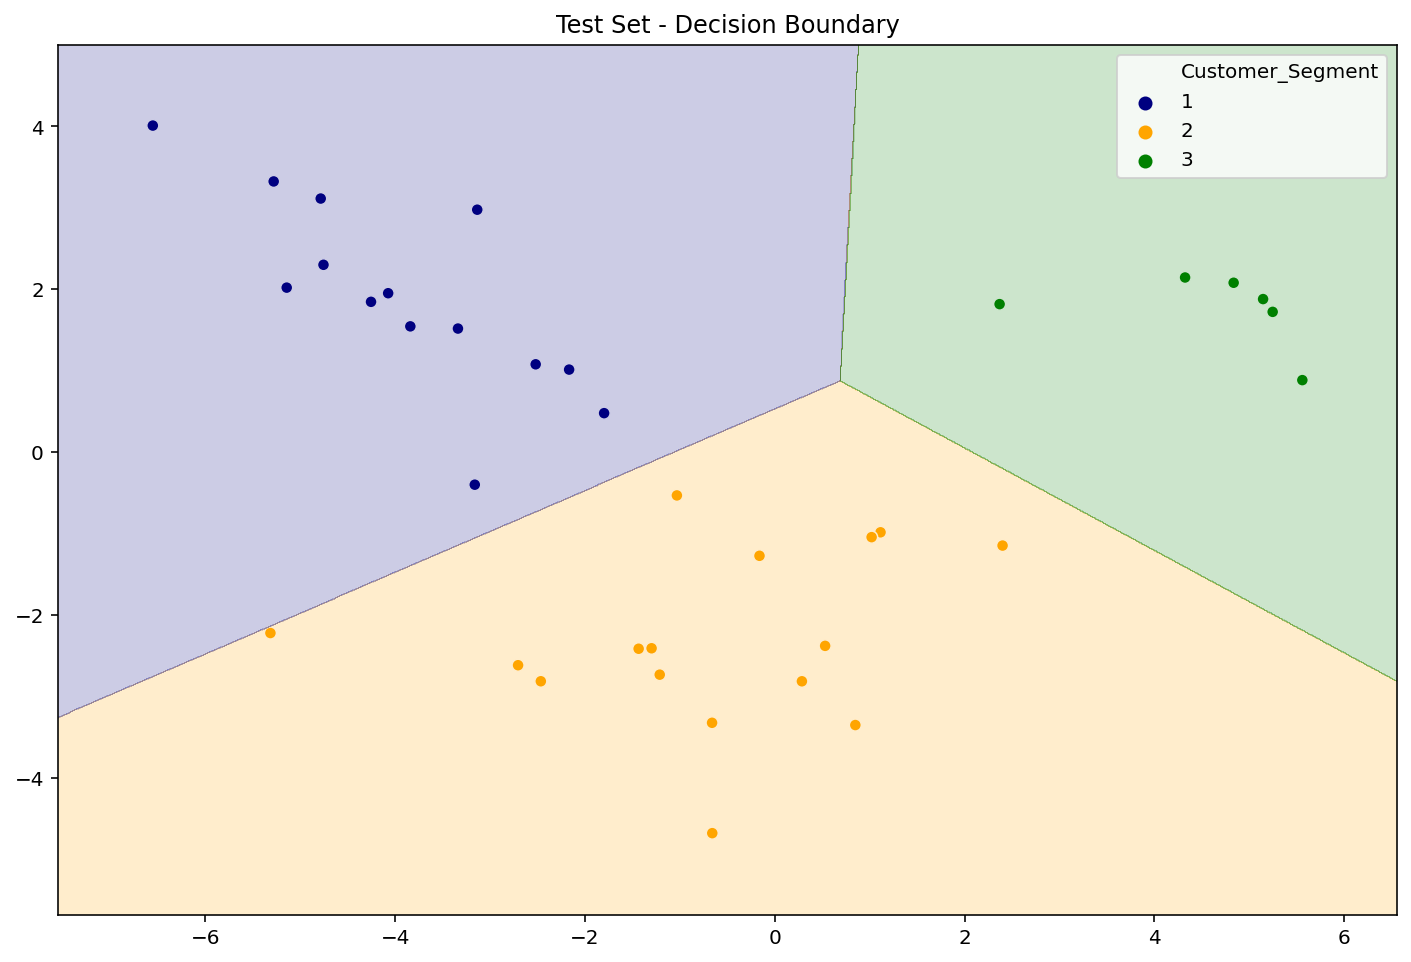

In [15]:
from matplotlib.colors import ListedColormap

X_pca = model[:2].transform(X_test)

fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(X_pca[:,0], X_pca[:,1], 
                    hue=y_test, palette=["navy", "orange", "green"], ax=ax)
xx, yy = np.mgrid[X_pca[:,0].min()-1:X_pca[:,0].max()+1:0.01,
                  X_pca[:,1].min()-1:X_pca[:,1].max()+1:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
classes = model[-1].predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, classes, cmap=ListedColormap(("navy", "orange", "green")), alpha=0.2)
ax.set_title("Test Set - Decision Boundary")
plt.show()